<a href="https://colab.research.google.com/github/cambo2018/Advanced-Dynamics/blob/main/5_49.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install whit-phys-util

     |████████████████████████████████| 10.9 MB 4.1 MB/s 


In [2]:
import whit_phys_util as buc
import matplotlib.pyplot as plt
from sympy import *

Mounted at /content/drive


In [3]:
repo = buc.local_repository("https://github.com/cambo2018/Advanced-Dynamics")

Cloning repository from GitHub.


Triangular Wave Equation:

$$f(x) = \frac{2A}{\pi}arcsin(sin(\frac{2\pi}{\tau}x))$$

In [4]:
var('A tau',positive=True)
var('x')

f = Piecewise((A*x+1,x < 0), (A*-x+1,x>=0))
f

Piecewise((A*x + 1, x < 0), (-A*x + 1, True))

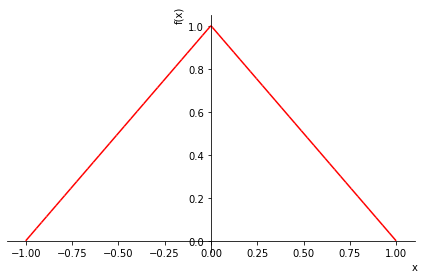

In [5]:
T = 2

params = {A: 1, tau: T}
fig1 = plot(f.subs(params), (x, -T/2, T/2),line_color="red",label="exact");

$$a_0 = \frac{1}{\tau} \int\limits_{-\tau/2}^{+\tau/2} f(t)\,dt$$

In [6]:
a0 = integrate(1/tau*f, (x, -tau/2, tau/2))
a0

-A*tau/4 + 1

$$a(n) = \frac{2}{\tau} \int\limits_{-\tau/2}^{+\tau/2} f(t) \cos(n \omega t)\,dt$$

In [7]:
var('n', integer = True, positive = True)
omega = 2*pi/tau

def a(n):
    return integrate(2/tau*cos(n*omega*x)*f, (x, -tau/2, tau/2))
a(n).simplify()

A*tau*(1 - (-1)**n)/(pi**2*n**2)

In [8]:
def b(n):
  return integrate(2/tau*sin(n*omega*x)*f, (x, -tau/2, tau/2))
b(n).simplify()

0

In [9]:
nmax = 2
f1 = a0 + Sum(a(n)*cos(n*omega*x) + b(n)*sin(n*omega*x), (n, 1, nmax))
f1

-A*tau/4 + Sum((-(-1)**n*A*tau/(pi**2*n**2) + A*tau/(pi**2*n**2))*cos(2*pi*n*x/tau), (n, 1, 2)) + 1

In [10]:
f1.doit()

2*A*tau*cos(2*pi*x/tau)/pi**2 - A*tau/4 + 1

In [11]:
def f_approx(nmax, x):
  f_sym = a0 + Sum(a(n)*cos(n*omega*x) + b(n)*sin(n*omega*x), (n, 1, nmax))
  return f_sym.doit()

In [12]:
f_approx(2, x)

2*A*tau*cos(2*pi*x/tau)/pi**2 - A*tau/4 + 1

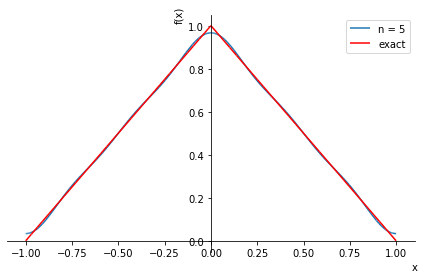

In [13]:
fig2 = plot(f_approx(5,x).subs(params), (x, -T/2, T/2), show = False, label="n = 5")
fig2.legend = True
fig2.extend(fig1)
fig2.show()

In [ ]:
buc.notebook_to_pdf(repo, author="Cameron Brewer", title="5.49")